# Mxture Density Network

@Author Juanwu Lu

@Date   Jan-05-23

The Mixture Density Network (MDN) models were first introduced by C. M. Bishop in his paper "[Mixture Density Networks](https://publications.aston.ac.uk/id/eprint/373/)". The initial motivation is to address the problems that the prediction of continous variables can suffer from limited description with _conditional average_ of the target variable.

## Preliminaries

The classic application of neural network model is to learn the **associative mappings** which are essentially the transformations from a set of input variables $\mathbf{x}=\{x_1,\ldots,x_d\}$ to a set of output variables $\mathbf{t}=\{t_1,\ldots,t_c\}$, where $d$ and $c$ are the dimensionality of input and output variables, respectively.

The most general and complete description of the _underlying mappings_ of the data is a statistical model which can be expressed in terms of the probability density $p(\mathbf{x}, \mathbf{t})$ in the joint input-output space, where $\int p(\mathbf{x},\mathbf{t})d\mathbf{x}d\mathbf{t}=1$. In cases with static distributions, one can decompose the joint probability density into the product of conditional density of the target data, conditioned on the input data.
$$
    p(\mathbf{x},\mathbf{t}) = p(\mathbf{t}|\mathbf{x})\cdot p(\mathbf{x})
$$
where the conditional probability $p(\mathbf{t}|\mathbf{x})$ is the key element to model.

### Conventional Least-Squares

As mentioned, the proposed MDN is to address the limited description with conditional average of the target variables in _conventional least-squares_ for continous variables. Before further discussion on the MDN, one should understand why such limitation exists.

__Notations__:
- Input variables: $\mathbf{x}=\{x_1,\ldots,x_d\}\in\mathcal{X}$, where $d$ is the input dimensionality.
- Output variables: $\mathbf{t}=\{t_1,\ldots,t_c\}\in\mathcal{T}$, where $c$ is the output dimensionality.
- Target model $f(\mathbf{x};\theta)=p(\mathbf{t}|\mathbf{x})$, where $\theta$ is the set of model parameters.
- Training dataset $(\mathbf{x}^q,\mathbf{t}^q)\in\mathcal{X}\times\mathcal{T},\quad q=1,\ldots,n$

Traditionally, the objective is to minimize the mean-squared error denoted as
$$
    J(\theta)=\frac{1}{2n}\sum\limits_{q=1}^n\sum\limits_{k=1}^c\left[f_k(\mathbf{x}^q;\theta)-\mathbf{t}_k^q\right]^2.
$$
As the number of training samples increases, the objective function is an asymptotic probalistic integral over joint input-output space
$$
\begin{aligned}
    J^\theta &= \lim_{n\rightarrow\infty}\frac{1}{2n}\sum\limits_{q=1}^n\sum\limits_{k=1}^c\left[f_k(\mathbf{x}^q;\theta)-\mathbf{t}_k^q\right]^2 \\
    &= \frac{1}{2}\sum_{k=1}^c\int\int\left[f_k(\mathbf{x};\theta)-\mathbf{t}_k\right]^2\cdot p(\mathbf{x},\mathbf{t})d\mathbf{t}d\mathbf{x}
\end{aligned}
$$
Let $\frac{\partial J^\theta}{\partial f_k(\mathbf{x};\theta)}=0$, one can solve for the optimal solution for minimizing the objective function
$$
    f_k(\mathbf{x};\theta^*)=\langle \mathbf{t}_k|x\rangle
$$
where $\langle Q|x\rangle$ is the _conditional average_ defined by $\langle Q|\mathbf{x}\rangle\equiv\int Q(\mathbf{t})p(\mathbf{t}|\mathbf{x})d\mathbf{t}$

Conversely, one can assume the conditional distribution of the target variable is indeed Gaussian, and assume that variables on different dimensions are independent and identically distributed random variables (i.i.d). Then, the conditional density is given by
$$
    p(\mathbf{t}|\mathbf{x})=\prod\limits_{k=1}^cp(\mathbf{t}_k|\mathbf{x})=\frac{1}{(2\pi)^{c/2}\sigma^c}\exp\left[-\frac{1}{2\sigma^2}\sum\limits_{k=1}^c\left[F_k(\mathbf{x})-\mathbf{t}_k\right]^2\right]
$$
where $F(\mathbf{x})$ is the _unknown underlying associative mapping_. Finally, the least-squares problem can also be formulated as an maximum log-likelihood problem, with an objective function of
$$
    J(\theta) = -\log\prod\limits_{q=1}^np(\mathbf{x}^q)\cdot p(\mathbf{t}^q|\mathbf{x}^q)
$$

Now, the problem of the above formulation is that the solution is only the conditional average $\langle \mathbf{t}_k|\mathbf{x}\rangle$, which has very limited statistic. In many applications, one may need more complete description of the probability distribution of the target data, such as the shape of a non-Gaussian distribution.

## Mixture Density Networks

Based on the preliminaries, the conventional least-squares technique can be derived from maximum likelihood with the assumption of **I.I.D Gaussian distributed target variables**. Therefore, it's rather intuitive to replace the Gaussian distribution with a _mixture model_ to improve flexibility and help model general distribution functions. By implementing a Gaussian kernel, the mixture density model is given by
$$
\begin{aligned}
    \quad& p(\mathbf{t}|\mathbf{x})=\sum\limits_{i=1}^m\alpha_i(\mathbf{x})\phi_i(\mathbf{t}|\mathbf{x}) \\
    \text{where} \quad& \phi_i(\mathbf{t}|\mathbf{x}) = \frac{1}{(2\pi)^{c/2}\sigma_i(\mathbf{x})}\exp\left[-\frac{\left\|\mathbf{t}-\mathbf{\mu}_i(\mathbf{x})\right\|^2}{2\sigma_i(\mathbf{x})^2}\right]
\end{aligned}
$$
where $m$ is the number of components in the mixture model, $\alpha_i(\mathbf{x})$ are the _mixing coefficients_ (can be regarded as _prior probabilities_ conditioned on $\mathbf{x}$), and the function $\phi_i(\mathbf{t}|\mathbf{x})$ represents the conditional density of the target vector $\mathbf{t}$ for the $i^{th}$ kernel.

Key beneficial takeways from this formalism are:
1. In principle, a Gaussian mixture model can approximate **any** given density function to arbitrary accuracy.
2. Compared to a single-Gaussian representation, the mixture model does not assume the components of $\mathbf{t}$ are statistically independent.

The proposed MDN makes direct use of a neural network as the associative mapping from input vector $\mathbf{x}$ to model parameters $\mathbf{z}=\left[\alpha_i(\mathbf{x}),\mathbf{\mu}_i(\mathbf{x}),\sigma_i(\mathbf{x})\right]$

In [58]:
from __future__ import annotations

import math
import random
from collections import OrderedDict
from typing import Optional, Tuple, Union

import numpy as np
import pandas as pd
import seaborn as sns
import torch as th
from matplotlib import pyplot as plt
from torch import nn, optim
from tqdm.notebook import tqdm

# Reproducibility
random.seed(42)
np_rng = np.random.default_rng(42)
th.manual_seed(42)

# Settings
device = th.device('cuda') if th.cuda.is_available() else th.device('cpu')
plt.style.use('seaborn-paper')
sns.set_style('white')

/var/folders/5b/2513cq1s09z6sw_ql0xmckcr0000gn/T/ipykernel_18537/2808321016.py:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


## Experiment: Simple Inverse Problem

Many potential applications of neural networks fall into the category of _inverse_ problem. For such problems there exists a well defined **forward** problem which is characterized by a functional (i.e. _single-valued_) mapping, which often corresponds to **causality** in a physical system. However, for inverse problems with multi-valued mappings, a standard neural network application can only approximate the conditional average, which can lead to extremely poor performance.

A simple example of an inverse problem is given by
$$
    y(x) = x + 0.3\sin(2\pi x)+\epsilon
$$

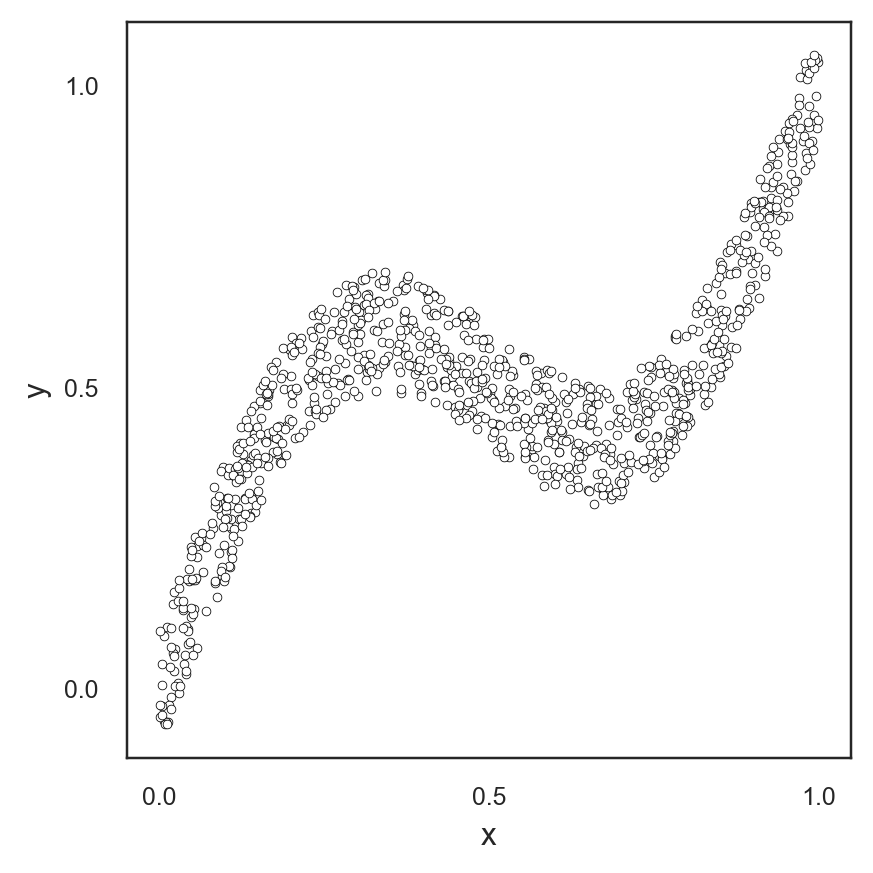

In [2]:
n_samples = 1000
x_data = np_rng.uniform(0.0, 1.0, size=[n_samples,])
epsilon = np_rng.uniform(-0.1, 0.1, size=[n_samples, ])
y_data = x_data + 0.3 * np.sin(2 * np.pi * x_data) + epsilon

fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=224)
ax.scatter(x_data, y_data, marker='.', ec='k', fc='white', lw=0.25, zorder=10)
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_xticks(np.arange(0.0, 1.1, 0.5))
ax.set_yticks(np.arange(0.0, 1.1, 0.5))
fig.tight_layout()

### Baseline: Trained with conventional mean-squares-error

As a baseline, we first train a neural network model. The model has $1$ input, $20$ hidden units with "tanh" activation functions, and $1$ linear output unit. The model is trained on 1,000 complete cycles/epochs.
$$
    \hat{y}(x)=\tanh(x\mathbf{W}_h+\mathbf{b}_h)\mathbf{W}_o+b_o
$$

The model is trained on standard mean-squared error loss function with vanilla Stochastic Gradient Descent (SGD) optimization solver.

In [3]:
def train_baseline(
    x_data: np.ndarray,
    y_data: np.ndarray,
    hidden_size: int = 20,
    num_epoch: int = 8000,
    log_freq: int = 1000,
    device: th.device = th.device('cpu'),
) -> np.ndarray:
    model = nn.Sequential(OrderedDict([
        ('hidden_linear', nn.Linear(1, hidden_size)),
        ('hidden_tanh', nn.Tanh()),
        ('output_linear', nn.Linear(hidden_size, 1))
    ]))
    model = model.to(device)
    model.train()
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())

    x, y = th.from_numpy(x_data).to(device), th.from_numpy(y_data).to(device)
    if x.ndim == 1:
        x = x.reshape(-1, 1)
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    x, y = x.float(), y.float()
    for epoch in range(num_epoch):
        optimizer.zero_grad()
        y_pred = model.forward(x)
        loss = loss_fn.forward(y_pred, y)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % log_freq == 0:
            print(
                f'Epoch [{epoch + 1:d}/{num_epoch:d}] '
                f'Loss {loss.item():.4f}.'
            )
    
    model.eval()
    x, _ = th.sort(x, dim=0)
    y_pred = model.forward(x).detach().cpu().numpy().squeeze(1)

    return y_pred


Train the forward problem

Train model with hidden_size=5
Epoch [1000/8000] Loss 0.0214.
Epoch [2000/8000] Loss 0.0212.
Epoch [3000/8000] Loss 0.0206.
Epoch [4000/8000] Loss 0.0185.
Epoch [5000/8000] Loss 0.0143.
Epoch [6000/8000] Loss 0.0038.
Epoch [7000/8000] Loss 0.0034.
Epoch [8000/8000] Loss 0.0034.
Train model with hidden_size=10
Epoch [1000/8000] Loss 0.0214.
Epoch [2000/8000] Loss 0.0213.
Epoch [3000/8000] Loss 0.0212.
Epoch [4000/8000] Loss 0.0209.
Epoch [5000/8000] Loss 0.0153.
Epoch [6000/8000] Loss 0.0033.
Epoch [7000/8000] Loss 0.0033.
Epoch [8000/8000] Loss 0.0033.
Train model with hidden_size=20
Epoch [1000/8000] Loss 0.0215.
Epoch [2000/8000] Loss 0.0214.
Epoch [3000/8000] Loss 0.0213.
Epoch [4000/8000] Loss 0.0211.
Epoch [5000/8000] Loss 0.0178.
Epoch [6000/8000] Loss 0.0037.
Epoch [7000/8000] Loss 0.0033.
Epoch [8000/8000] Loss 0.0033.
Train model with hidden_size=40
Epoch [1000/8000] Loss 0.0214.
Epoch [2000/8000] Loss 0.0212.
Epoch [3000/8000] Loss 0.0189.
Epoch [4000/8000] Loss 0.0035.
Epoch

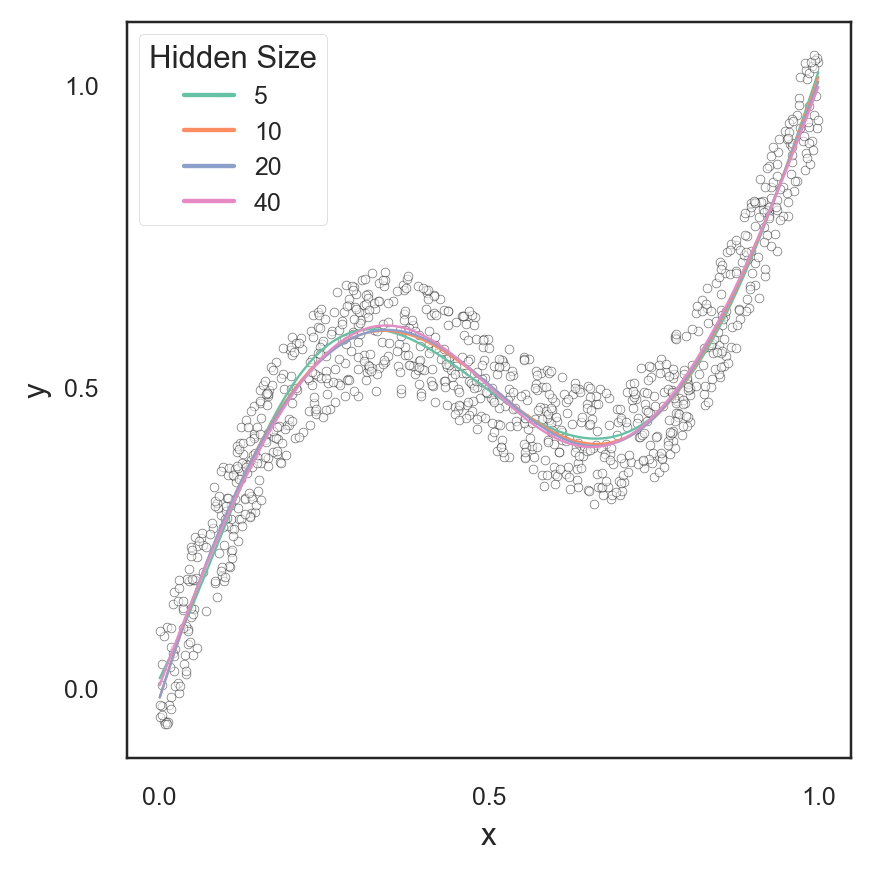

In [4]:
preds = pd.DataFrame(columns=['x', 'y', 'Hidden Size'])
for hidden_size in [5, 10, 20, 40]:
    print('Train model with hidden_size=%d' % hidden_size)
    y_pred = train_baseline(x_data, y_data, hidden_size)
    sub_df = pd.DataFrame.from_dict({'x': np.sort(x_data), 'y': y_pred})
    sub_df['Hidden Size'] = hidden_size
    preds = pd.concat(objs=[preds, sub_df])

fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=224)
ax = sns.lineplot(
    data=preds, x='x', y='y', hue='Hidden Size', palette='Set2',
    linestyle='-', color='k', linewidth=0.75, zorder=20, ax=ax
)
ax.scatter(x_data, y_data, marker='.', ec='k', fc='white',
           lw=0.25, zorder=10, alpha=0.5)
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_xticks(np.arange(0.0, 1.1, 0.5))
ax.set_yticks(np.arange(0.0, 1.1, 0.5))
fig.tight_layout()

Now consider the corresponding inverse problem in which we solve for a mapping from $y$ variable to the $x$ variable.

Train model with hidden_size=5
Epoch [1000/8000] Loss 0.0497.
Epoch [2000/8000] Loss 0.0495.
Epoch [3000/8000] Loss 0.0494.
Epoch [4000/8000] Loss 0.0493.
Epoch [5000/8000] Loss 0.0492.
Epoch [6000/8000] Loss 0.0492.
Epoch [7000/8000] Loss 0.0491.
Epoch [8000/8000] Loss 0.0491.
Train model with hidden_size=10
Epoch [1000/8000] Loss 0.0498.
Epoch [2000/8000] Loss 0.0494.
Epoch [3000/8000] Loss 0.0492.
Epoch [4000/8000] Loss 0.0491.
Epoch [5000/8000] Loss 0.0490.
Epoch [6000/8000] Loss 0.0489.
Epoch [7000/8000] Loss 0.0487.
Epoch [8000/8000] Loss 0.0484.
Train model with hidden_size=20
Epoch [1000/8000] Loss 0.0491.
Epoch [2000/8000] Loss 0.0491.
Epoch [3000/8000] Loss 0.0491.
Epoch [4000/8000] Loss 0.0490.
Epoch [5000/8000] Loss 0.0490.
Epoch [6000/8000] Loss 0.0489.
Epoch [7000/8000] Loss 0.0488.
Epoch [8000/8000] Loss 0.0481.
Train model with hidden_size=40
Epoch [1000/8000] Loss 0.0491.
Epoch [2000/8000] Loss 0.0491.
Epoch [3000/8000] Loss 0.0490.
Epoch [4000/8000] Loss 0.0490.
Epoch

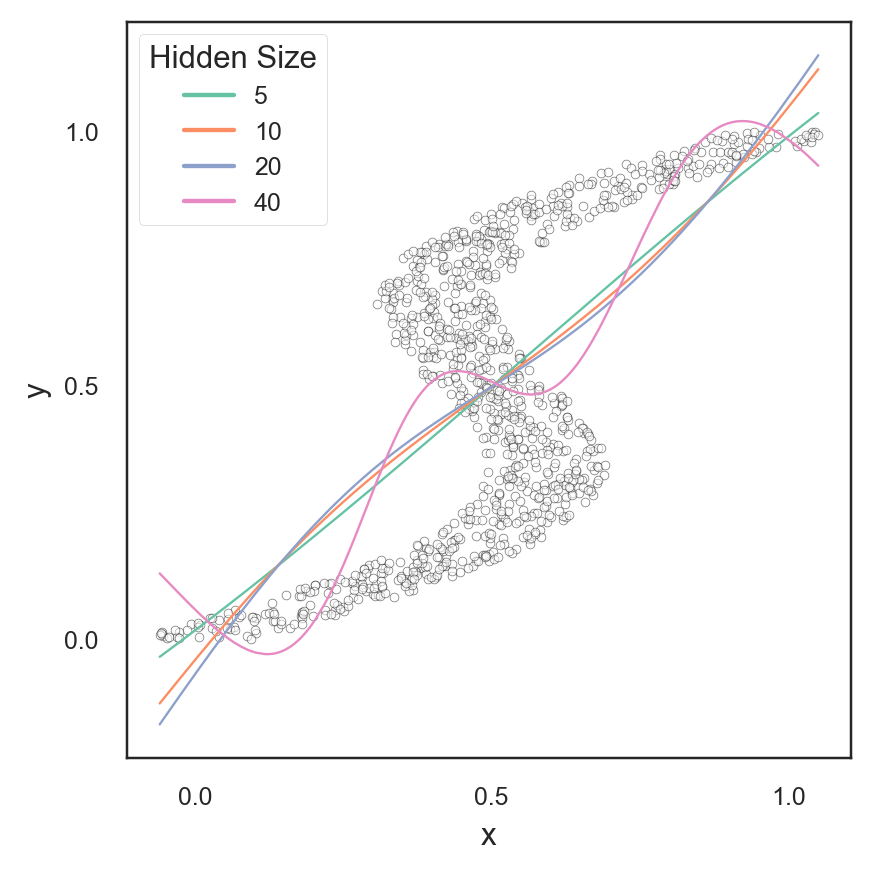

In [5]:
preds = pd.DataFrame(columns=['x', 'y', 'Hidden Size'])
for hidden_size in [5, 10, 20, 40]:
    print('Train model with hidden_size=%d' % hidden_size)
    y_pred = train_baseline(y_data, x_data, hidden_size)
    sub_df = pd.DataFrame.from_dict({'x': np.sort(y_data), 'y': y_pred})
    sub_df['Hidden Size'] = hidden_size
    preds = pd.concat(objs=[preds, sub_df])

fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=224)
ax = sns.lineplot(
    data=preds, x='x', y='y', hue='Hidden Size', palette='Set2',
    linestyle='-', color='k', linewidth=0.75, zorder=20, ax=ax
)
ax.scatter(y_data, x_data, marker='.', ec='k', fc='white',
           lw=0.25, zorder=10, alpha=0.5)
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_xticks(np.arange(0.0, 1.1, 0.5))
ax.set_yticks(np.arange(0.0, 1.1, 0.5))
fig.tight_layout()

Key takeaways:
- For the inverse problem, the network which optimizes a conventional mean least squares has a very poor representation of the process.
- The precise form of the neural network mapping is now more sensitive to network architecture, weight initialization, etc., than for the forward problem.

### Train with Mixture Density Network (MDN)

In the original paper, a standard multi-layer perceptron, with a single hidden layer of sigmoidal units and an output layer of linear units is used to build the MDN.

Eventually, the network outputs three variables:
- mixing coefficients $\alpha_i(\mathbf{x})=\frac{\exp(z_i^\alpha)}{\sum_{j=1}^M\exp(z_j^\alpha)}$ derived from "softmax" function,
- variances $\sigma_i(\mathbf{x})=\exp(z_i^\sigma)$,
- and, centers $\mathbf{\mu}_i(\mathbf{x})=z_{ik}^\mu$.

In [8]:
class MDN(nn.Module):

    def __init__(
        self,
        in_features: int,
        hidden_size: int,
        n_components: int,
        out_features: int = 1
    ) -> None:
        super().__init__()

        self.n_components = n_components
        self.out_features = out_features

        self.hidden_net = nn.Sequential(
            nn.Linear(in_features, hidden_size),
            nn.Tanh(),
        )
        self.coef_net = nn.Linear(hidden_size, n_components)  # alpha
        self.mean_net = nn.Linear(hidden_size, n_components * out_features) 
        self.log_scale_net = nn.Linear(hidden_size, n_components) # sigma

    def forward(
        self,
        input: th.Tensor
    ) -> Tuple[th.Tensor, th.Tensor, th.Tensor]:
        bs: int = input.shape[0]

        z_h = self.hidden_net.forward(input.float()) 
        alpha = nn.functional.softmax(self.coef_net.forward(z_h), -1)
        mean = self.mean_net.forward(z_h)
        sigma = self.log_scale_net.forward(z_h).exp()

        alpha = alpha.reshape(bs, self.n_components, 1)
        mean = mean.reshape(bs, self.n_components, self.out_features)
        sigma = sigma.reshape(bs, self.n_components, 1)

        return alpha, mean, sigma


Different from the conventional least-squares models, the MDN models are trained with minimizing the negative logarithm of the likelihood, given by
$$
\begin{aligned}
    \mathcal{L}(\theta) &= -\log\left[\sum_{i=1}^m\alpha_i(\mathbf{x}^q)\phi_i(\mathbf{t}^q|\mathbf{x}^q)\right] \\
    &= -\log\left[\sum_{i=1}^m\alpha_i(\mathbf{x}^q)\cdot \frac{1}{(2\pi)^{c/2}\sigma_i(\mathbf{x})^c}\exp\left[-\frac{\left\|\mathbf{t}^q-\mathbf{\mu}_i(\mathbf{x})\right\|^2}{2\sigma_i(\mathbf{x})^2}\right]\right]
\end{aligned}
$$

In [9]:
def gaussian_kernel(
    y: th.Tensor,
    mean: th.Tensor,
    var: th.Tensor
) -> th.Tensor:
    t_dim = y.shape[-1]
    y = y.unsqueeze(1)  # unsqueeze component dimension
    log_exp = -0.5 * ((y.expand_as(mean) - mean) * th.reciprocal(var)) ** 2
    kernel = 1 / (2 * math.pi) ** (t_dim / 2) / var ** t_dim * log_exp.exp()
    return kernel

def mdn_loss_fn(
    alpha: th.Tensor,
    y: th.Tensor,
    mean: th.Tensor,
    var: th.Tensor
) -> th.Tensor:
    mixture = gaussian_kernel(y, mean, var) * alpha
    mixture = th.sum(mixture, dim=1).squeeze(-1)
    loss = -th.log(mixture)
    return loss.mean()


The network component of the MDN is a multi-layer perceptron with 1 input, 20 hidden units with "tanh" activation functions, and 9 output units (corresponding to the 3 parameters for each of the 3 Gaussian kernel functions).

In [10]:
model = MDN(1, 20, 3, 1).to(device)
model.train()

num_epoch: int = 8000
optimizer = optim.Adam(model.parameters())
x, y = th.from_numpy(x_data).to(device), th.from_numpy(y_data).to(device)
x, y = x.unsqueeze(1), y.unsqueeze(1)
x, y = x.float(), y.float()
for epoch in range(num_epoch):
    optimizer.zero_grad()
    alpha, mean, var = model.forward(x)
    loss = mdn_loss_fn(alpha, y, mean, var)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1:d}/{num_epoch:d}] Loss {loss.item():.4f}')

Epoch [1000/8000] Loss -1.1952
Epoch [2000/8000] Loss -1.4145
Epoch [3000/8000] Loss -1.4294
Epoch [4000/8000] Loss -1.4369
Epoch [5000/8000] Loss -1.4495
Epoch [6000/8000] Loss -1.4825
Epoch [7000/8000] Loss -1.4906
Epoch [8000/8000] Loss -1.4932


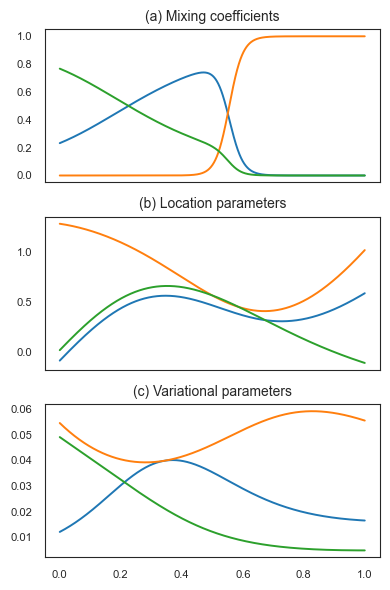

In [60]:
model.eval()
x_test_data = np.linspace(0.0, 1.0, num=n_samples)
x = th.from_numpy(x_test_data).to(device).unsqueeze(1)
alpha, mean, var = model.forward(x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4, 6), sharex=True)
ax1.plot(x_test_data, alpha.squeeze(-1).detach().cpu().numpy())
ax1.set_title('(a) Mixing coefficients', fontsize=10)
ax2.plot(x_test_data, mean.squeeze(-1).detach().cpu().numpy())
ax2.set_title('(b) Location parameters', fontsize=10)
ax3.plot(x_test_data, var.squeeze(-1).detach().cpu().numpy())
ax3.set_title('(c) Variational parameters', fontsize=10)
fig.tight_layout()

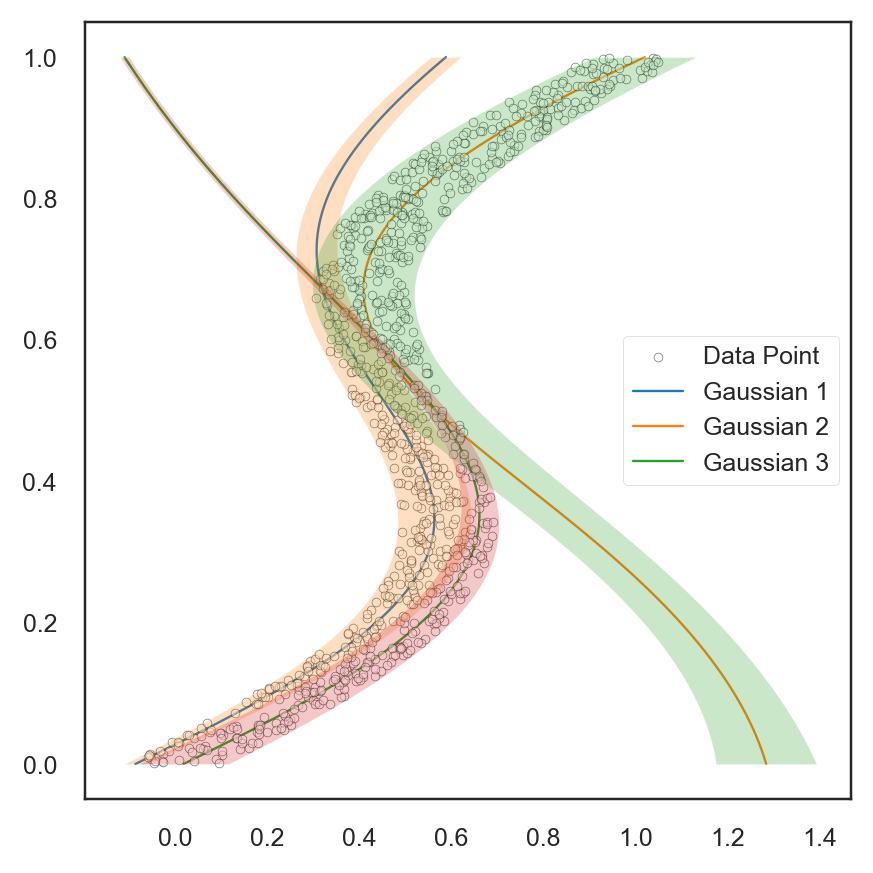

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=224)
ax.scatter(y_data, x_data, zorder=10, alpha=0.5, label='Data Point',
           marker='.', linewidth=0.25, ec='k', fc='w')
if mean.ndim == 3:
    mean = mean.squeeze(-1)
if var.ndim == 3:
    var = var.squeeze(-1)
for i, (mean_k, var_k) in enumerate(zip(
    mean.detach().cpu().numpy().T, var.detach().cpu().numpy().T
)):
    ax.plot(mean_k, x_test_data, linewidth=0.75, label=f'Gaussian {i + 1:d}')
    ax.fill_betweenx(
        x_test_data, mean_k - 2 * var_k, mean_k + 2 * var_k,
        alpha=0.25, zorder=20
    )
ax.legend()
fig.tight_layout()

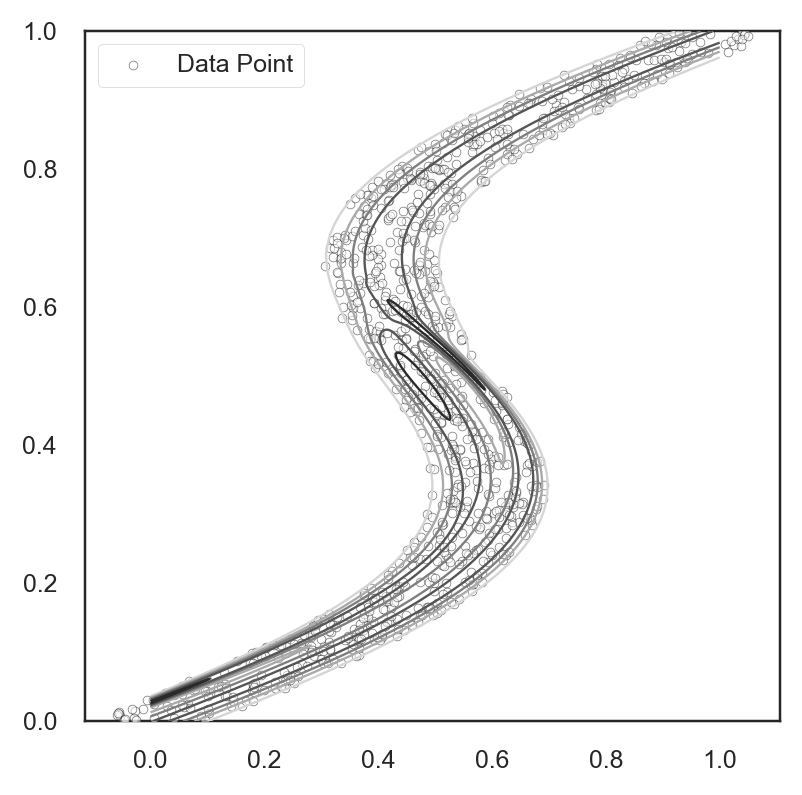

In [48]:
# Plot Mixture Model
x, y = np.linspace(0.0, 1.0, n_samples), np.linspace(0.0, 1.0, n_samples)
X, Y = np.meshgrid(x, y)
model.eval()
x_in = th.from_numpy(X.reshape(-1, 1)).to(device)
y_in = th.from_numpy(Y.reshape(-1, 1)).to(device)
alpha, mean, var = model.forward(x_in)
probs = gaussian_kernel(y_in, mean, var)
probs = th.sum(probs * alpha, dim=1)

fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=224)
ax.contour(
    Y, X, probs.detach().cpu().numpy().reshape(n_samples, n_samples),
    cmap='binary', zorder=20, linewidths=0.75
)
ax.scatter(y_data, x_data, zorder=10, alpha=0.5, label='Data Point',
           marker='.', linewidth=0.25, ec='k', fc='w')
ax.legend()

## Experiment: Robot Kinematics

Another application example considers the kinematics of a simple 2-link robot arm. The end effector is moved to a position given by the Cartesian coordinates
$$
\begin{aligned}
    x_1 &= L_1\cos(\theta_1) - L_2\cos(\theta_1 + \theta_2) \\ 
    x_2 &= L_1\sin(\theta_1) - L_2\sin(\theta_1 + \theta_2)
\end{aligned}
$$

In the example, we consider a particular configuration of robot for which $L_1=0.8$ and $L_2=0.2$ and where $\theta_1$ is _restricted to_ the range $(0.3, 1.2)$ and $\theta_2$ is restricted to the range $(\pi/2, 3\pi/2)$. This gives us the formulation of the problem.
- _Forward Kinematics_: Mappings from $(\theta_1, \theta_2)$ to $(x_1, x_2)$; single-valued
- _Inverse Kinematics_: Mappings from target $(x_1, x_2)$ to $(\theta_1, \theta_2)$; non-single-valued

The reason that the inverse problem is non-single-valued is the fact that two elbow-states can leads to the same end-position of the effector, namely:
- _Elbow-up_: $\theta_2\leq\pi$;
- _Elbow-down_: $\theta_2>\pi$.

From the visualization, we can see there are roughly three regions in the space which are accessible to
1. elbow down only (upper-left);
2. elbow up only (lower-right); and
3. both elbow down and up.

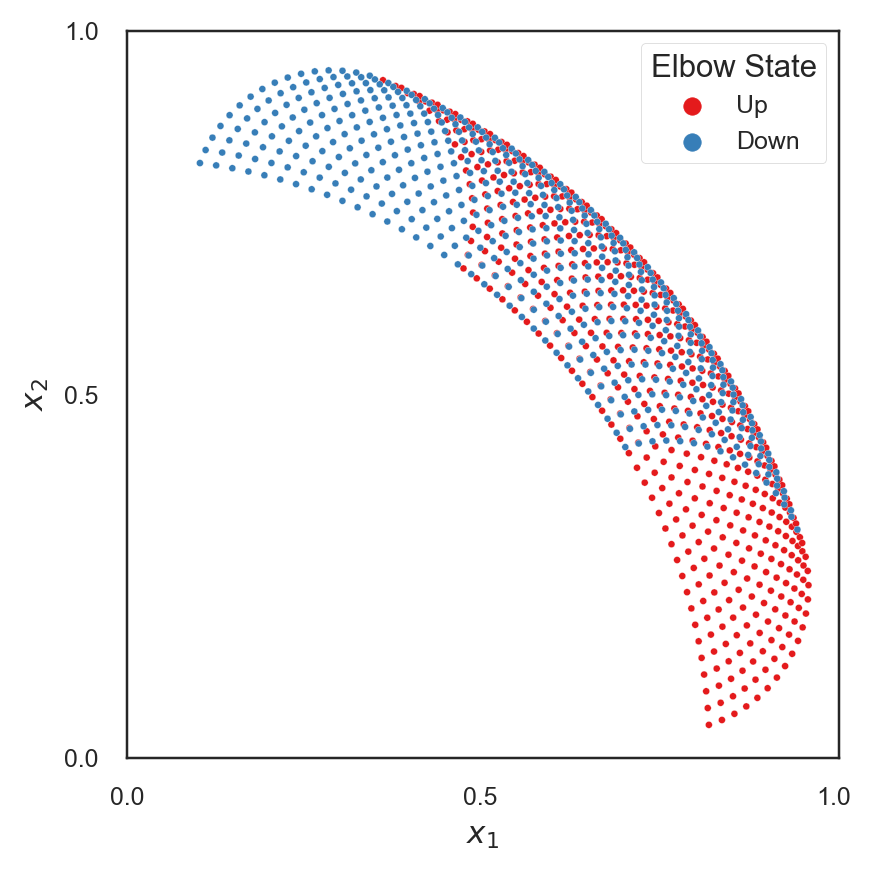

In [48]:
n_samples: int = 33
l1, l2 = 0.8, 0.2
theta_1 = np.linspace(0.3, 1.2, num=n_samples)
theta_2 = np.linspace(np.pi / 2, 3 * np.pi / 2, num=n_samples)
theta_1, theta_2 = np.meshgrid(theta_1, theta_2)
theta_1, theta_2 = theta_1.flatten(), theta_2.flatten()
x_1 = l1 * np.cos(theta_1) - l2 * np.cos(theta_1 + theta_2)
x_2 = l1 * np.sin(theta_1) - l2 * np.sin(theta_1 + theta_2)

dataset = pd.DataFrame.from_dict({
    'theta_1': theta_1, 'theta_2': theta_2,
    'x_1': x_1, 'x_2': x_2
})
dataset.loc[:, 'Elbow State'] = 'Undefined'
dataset.loc[(dataset['theta_2'] <= np.pi), 'Elbow State'] = 'Up'
dataset.loc[(dataset['theta_2'] > np.pi), 'Elbow State'] = 'Down'
dataset = dataset.loc[(dataset['x_1'] >=0) & (dataset['x_2'] >= 0)]
fig, ax = plt.subplots(1,  1, figsize=(4, 4), dpi=224)
ax = sns.scatterplot(
    data=dataset, x='x_1', y='x_2', hue='Elbow State', palette='Set1',
    ax=ax, marker='.', linewidth=0.1, s=20
)
ax.set_xlabel(r'$x_1$', fontsize=10)
ax.set_xticks(np.arange(0.0, 1.1, 0.5))
ax.set_ylabel(r'$x_2$', fontsize=10)
ax.set_yticks(np.arange(0.0, 1.1, 0.5))
fig.tight_layout()

For training, we generate a training set of 1,000 points by selecting pairs of joint angles at random with uniform distribution within the allowed limits, and computing the corresponding end effecctor coordinates using the single-valued mapping. Similarily, we generate a testing set that also consists of 1,000 points, but with a different random selection of joint angles.

In [65]:
n_samples: int = 2000
l1, l2 = 0.8, 0.2
theta_1 = np_rng.uniform(0.3, 1.2, size=n_samples)
theta_2 = np_rng.uniform(np.pi / 2, 3 * np.pi / 2, size=n_samples)
x_1 = l1 * np.cos(theta_1) - l2 * np.cos(theta_1 + theta_2)
x_2 = l1 * np.sin(theta_1) - l2 * np.sin(theta_1 + theta_2)

# Split the dataset
x_trn_data = np.hstack(tup=(x_1[:1000, None], x_2[:1000, None]))
y_trn_data = np.hstack(tup=(x_1[:1000, None], x_2[:1000, None]))
x_tst_data = np.hstack(tup=(x_1[1000:, None], x_2[1000:, None]))
y_tst_data = np.hstack(tup=(x_1[1000:, None], x_2[1000:, None]))

First we train a standard neural network by minimizing a sum of squares error function.

In [76]:
def train_baseline(x_data: Union[np.ndarray, th.Tensor],
                   y_data: Union[np.ndarray, th.Tensor],
                   x_test_data: Optional[Union[np.ndarray, th.Tensor]] = None,
                   hidden_size: int = 5,
                   num_epochs: int = 3000,
                   log_freq: int = 500,
                   device: th.device = th.device('cpu')
                   ) -> Optional[th.Tensor]:
    model = nn.Sequential(OrderedDict([
        ('Hidden', nn.Linear(x_data.shape[-1], hidden_size)),
        ('Activation', nn.Tanh()),
        ('Output', nn.Linear(hidden_size, y_data.shape[-1]))
    ])).to(device)
    model.train()
    optimizer = optim.Adam(model.parameters())
    loss_fn = nn.MSELoss()

    # main training loop
    if isinstance(x_data, np.ndarray):
        x_data = th.from_numpy(x_data)
    if isinstance(y_data, np.ndarray):
        y_data = th.from_numpy(y_data)
    x_data, y_data = x_data.to(device).float(), y_data.to(device).float()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        y = model.forward(x_data)
        y_pred = th.hstack(tensors=[
            l1 * th.cos(y[:, 0:1]) - l2 * th.cos(y[:, 0:1] + y[:, 1:]),
            l1 * th.sin(y[:, 0:1]) - l2 * th.sin(y[:, 0:1] + y[:, 1:])
        ])
        loss = loss_fn.forward(y_pred, y_data)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % log_freq == 0:
            print(
                f'Train: [{epoch + 1:d}/{num_epochs:d}] Loss {loss.item():.4f}'
            )

    y_test_pred = None
    if x_test_data is not None:
        if isinstance(x_test_data, np.ndarray):
            x_test_data = th.from_numpy(x_test_data) 
        x_test_data = x_test_data.to(device).float()
        model.eval()
        y = model.forward(x_test_data)
        y_test_pred = th.hstack(tensors=[
            l1 * th.cos(y[:, 0:1]) - l2 * th.cos(y[:, 0:1] + y[:, 1:]),
            l1 * th.sin(y[:, 0:1]) - l2 * th.sin(y[:, 0:1] + y[:, 1:])
        ])
    
    return y_test_pred


In [85]:
best_hs, best_rms, best_pred = None, float('inf'), None
for hidden_size in [5, 10, 15, 20, 25]:
    y_test_pred = train_baseline(x_data=x_trn_data,
                                 y_data=y_trn_data,
                                 x_test_data=x_tst_data,
                                 hidden_size=hidden_size,
                                 num_epochs=8000,
                                 log_freq=1000,
                                 device=device)
    y_test_data = th.from_numpy(y_tst_data).to(device).float()
    rms = th.sqrt(nn.functional.mse_loss(y_test_pred, y_test_data))
    print(f'Test: Hidden Size = {hidden_size:d}, RMS error = {rms:.2%}.')
    if rms <= best_rms:
        best_hs = hidden_size
        best_rms = rms
        best_pred = y_test_pred.detach().cpu().numpy()
print(f'Done! Best Hidden Size = {best_hs:d}, Min RMS error = {best_rms:.2%}')

Train: [1000/8000] Loss 0.0018
Train: [2000/8000] Loss 0.0015
Train: [3000/8000] Loss 0.0014
Train: [4000/8000] Loss 0.0013
Train: [5000/8000] Loss 0.0012
Train: [6000/8000] Loss 0.0010
Train: [7000/8000] Loss 0.0008
Train: [8000/8000] Loss 0.0007
Test: Hidden Size = 5, RMS error = 2.71%.
Train: [1000/8000] Loss 0.0013
Train: [2000/8000] Loss 0.0011
Train: [3000/8000] Loss 0.0009
Train: [4000/8000] Loss 0.0008
Train: [5000/8000] Loss 0.0007
Train: [6000/8000] Loss 0.0007
Train: [7000/8000] Loss 0.0006
Train: [8000/8000] Loss 0.0005
Test: Hidden Size = 10, RMS error = 2.12%.
Train: [1000/8000] Loss 0.0013
Train: [2000/8000] Loss 0.0012
Train: [3000/8000] Loss 0.0011
Train: [4000/8000] Loss 0.0010
Train: [5000/8000] Loss 0.0009
Train: [6000/8000] Loss 0.0007
Train: [7000/8000] Loss 0.0007
Train: [8000/8000] Loss 0.0005
Test: Hidden Size = 15, RMS error = 2.23%.
Train: [1000/8000] Loss 0.0012
Train: [2000/8000] Loss 0.0011
Train: [3000/8000] Loss 0.0009
Train: [4000/8000] Loss 0.0008
Trai

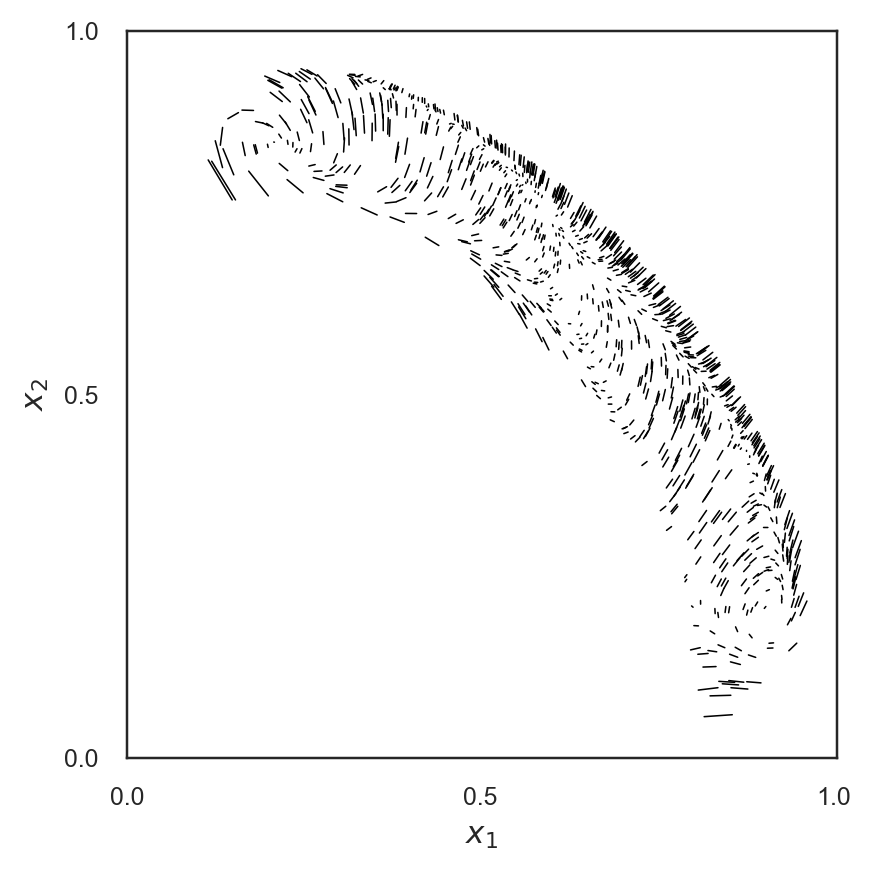

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=224)
for xy_pred, xy_gt in zip(best_pred, y_tst_data):
    ax.plot([xy_pred[0], xy_gt[0]], [xy_pred[1], xy_gt[1]],
            color='k', linestyle='-', linewidth=0.5)
ax.set_xlabel(r'$x_1$', fontsize=10)
ax.set_xticks(np.arange(0.0, 1.1, 0.5))
ax.set_ylabel(r'$x_2$', fontsize=10)
ax.set_yticks(np.arange(0.0, 1.1, 0.5))
fig.tight_layout()

The same datasets are also used to train an MDN having **two kernel functions** in the mixture model. The network component of the MDN was a standard MLP with two inputs, $N$ hidden units, and 8 output units.u

In [89]:
class MDN(nn.Module):

    def __init__(
        self,
        in_features: int,
        hidden_size: int,
        n_components: int,
        out_features: int = 1
    ) -> None:
        super().__init__()

        self.n_components = n_components
        self.out_features = out_features

        self.hidden_net = nn.Sequential(
            nn.Linear(in_features, hidden_size),
            nn.Tanh(),
        )
        self.coef_net = nn.Linear(hidden_size, n_components)  # alpha
        self.mean_net = nn.Linear(hidden_size, n_components * out_features) 
        self.log_scale_net = nn.Linear(hidden_size, n_components) # sigma

    def forward(
        self,
        input: th.Tensor
    ) -> Tuple[th.Tensor, th.Tensor, th.Tensor]:
        bs: int = input.shape[0]

        z_h = self.hidden_net.forward(input.float()) 
        alpha = nn.functional.softmax(self.coef_net.forward(z_h), -1)
        mean = self.mean_net.forward(z_h)
        sigma = self.log_scale_net.forward(z_h).exp()

        alpha = alpha.reshape(bs, self.n_components, 1)
        mean = mean.reshape(bs, self.n_components, self.out_features)
        sigma = sigma.reshape(bs, self.n_components, 1)

        return alpha, mean, sigma


In [90]:
def gaussian_kernel(
    y: th.Tensor,
    mean: th.Tensor,
    var: th.Tensor
) -> th.Tensor:
    t_dim = y.shape[-1]
    y = y.unsqueeze(1)  # unsqueeze component dimension
    log_exp = -0.5 * ((y.expand_as(mean) - mean) * th.reciprocal(var)) ** 2
    kernel = 1 / (2 * math.pi) ** (t_dim / 2) / var ** t_dim * log_exp.exp()
    return kernel

def mdn_loss_fn(
    alpha: th.Tensor,
    y: th.Tensor,
    mean: th.Tensor,
    var: th.Tensor
) -> th.Tensor:
    mixture = gaussian_kernel(y, mean, var) * alpha
    mixture = th.sum(mixture, dim=1).squeeze(-1)
    loss = -th.log(mixture)
    return loss.mean()


In [129]:
def train_mdn(x_data: Union[np.ndarray, th.Tensor],
              y_data: Union[np.ndarray, th.Tensor],
              x_test_data: Optional[Union[np.ndarray, th.Tensor]] = None,
              hidden_size: int = 5,
              n_components: int = 2,
              num_epochs: int = 3000,
              log_freq: int = 500,
              device: th.device = th.device('cpu')
              ) -> Optional[th.Tensor]:
    model = MDN(in_features=x_data.shape[-1],
                hidden_size=hidden_size,
                n_components=n_components,
                out_features=y_data.shape[-1])
    model = model.to(device)
    model.train()
    optimizer = optim.Adam(model.parameters())
    loss_fn = mdn_loss_fn

    # main training loop
    if isinstance(x_data, np.ndarray):
        x_data = th.from_numpy(x_data)
    if isinstance(y_data, np.ndarray):
        y_data = th.from_numpy(y_data)
    x_data, y_data = x_data.to(device).float(), y_data.to(device).float()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        alpha, mean, var = model.forward(x_data)
        mean = th.hstack(tensors=[
            l1*th.cos(mean[:, 0:1]) - l2*th.cos(mean[:, 0:1] + mean[:, 1:]),
            l1*th.sin(mean[:, 0:1]) - l2*th.sin(mean[:, 0:1] + mean[:, 1:])
        ])
        loss = loss_fn(alpha, y_data, mean, var)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % log_freq == 0:
            print(
                f'Train: [{epoch + 1:d}/{num_epochs:d}] Loss {loss.item():.4f}'
            )

    y_test_pred = None
    if x_test_data is not None:
        if isinstance(x_test_data, np.ndarray):
            x_test_data = th.from_numpy(x_test_data) 
        x_test_data = x_test_data.to(device).float()
        model.eval()
        alpha, mean, var = model.forward(x_test_data)
        mean = th.hstack(tensors=[
            l1*th.cos(mean[:, 0:1]) - l2*th.cos(mean[:, 0:1] + mean[:, 1:]),
            l1*th.sin(mean[:, 0:1]) - l2*th.sin(mean[:, 0:1] + mean[:, 1:])
        ])
        # select the component with the largest central value
        indices = th.argmax(alpha / var ** y_data.shape[-1], 1).squeeze(-1)
        mean = mean[th.arange(mean.shape[0]), indices]
    
    return mean

In [130]:
best_hs, best_rms, best_pred = None, float('inf'), None
for hidden_size in [5, 10, 15, 20, 25]:
    y_test_pred = train_mdn(x_data=x_trn_data,
                            y_data=y_trn_data,
                            x_test_data=x_tst_data,
                            hidden_size=hidden_size,
                            n_components=2,
                            num_epochs=8000,
                            log_freq=1000,
                            device=device)
    y_test_data = th.from_numpy(y_tst_data).to(device).float()
    rms = th.sqrt(nn.functional.mse_loss(y_test_pred, y_test_data))
    print(f'Test: Hidden Size = {hidden_size:d}, RMS error = {rms:.2%}.')
    if rms <= best_rms:
        best_hs = hidden_size
        best_rms = rms
        best_pred = y_test_pred.detach().cpu().numpy()
print(f'Done! Best Hidden Size = {best_hs:d}, Min RMS error = {best_rms:.2%}')


Train: [1000/8000] Loss -6.5784
Train: [2000/8000] Loss -8.0958
Train: [3000/8000] Loss -8.3450
Train: [4000/8000] Loss -8.5619
Train: [5000/8000] Loss -8.7882
Train: [6000/8000] Loss -9.0646
Train: [7000/8000] Loss -9.4007
Train: [8000/8000] Loss -9.7145
Test: Hidden Size = 5, RMS error = 0.33%.
Train: [1000/8000] Loss -7.8664
Train: [2000/8000] Loss -8.2830
Train: [3000/8000] Loss -8.6418
Train: [4000/8000] Loss -8.9681
Train: [5000/8000] Loss -9.3531
Train: [6000/8000] Loss -9.6309
Train: [7000/8000] Loss -9.8398
Train: [8000/8000] Loss -10.0291
Test: Hidden Size = 10, RMS error = 0.42%.
Train: [1000/8000] Loss -8.0434
Train: [2000/8000] Loss -8.3687
Train: [3000/8000] Loss -8.5671
Train: [4000/8000] Loss -8.7663
Train: [5000/8000] Loss -8.9488
Train: [6000/8000] Loss -9.1215
Train: [7000/8000] Loss -9.2769
Train: [8000/8000] Loss -9.3790
Test: Hidden Size = 15, RMS error = 0.61%.
Train: [1000/8000] Loss -8.2281
Train: [2000/8000] Loss -9.3408
Train: [3000/8000] Loss -9.4814
Train: 

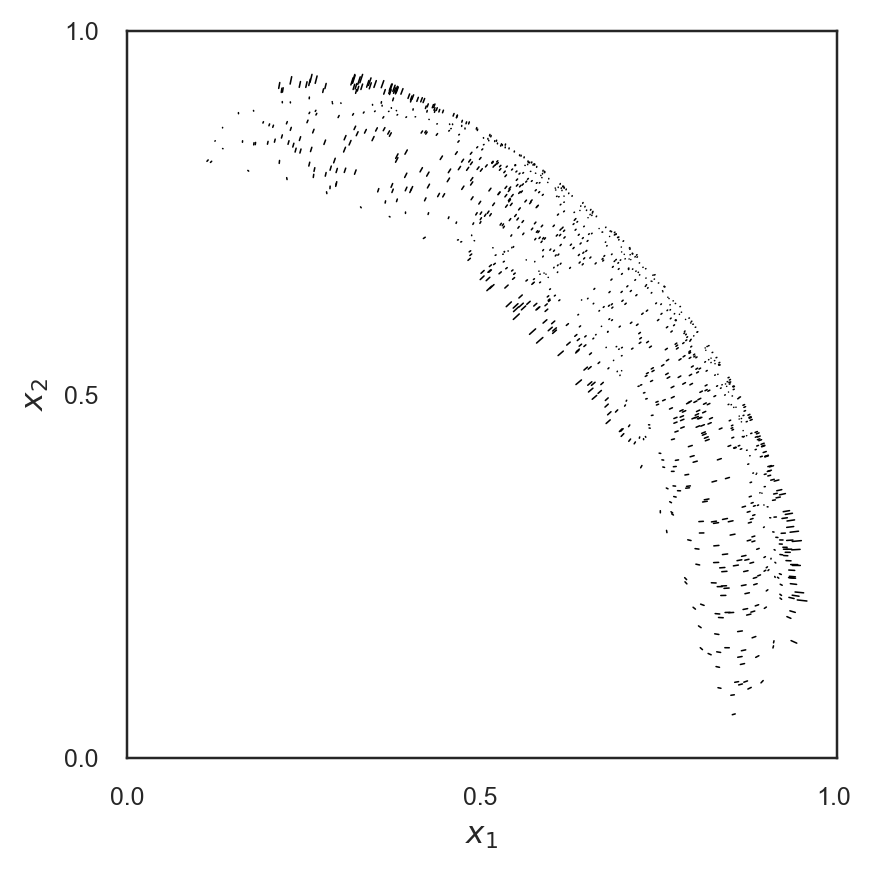

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=224)
for xy_pred, xy_gt in zip(best_pred, y_tst_data):
    ax.plot([xy_pred[0], xy_gt[0]], [xy_pred[1], xy_gt[1]],
            color='k', linestyle='-', linewidth=0.5)
ax.set_xlabel(r'$x_1$', fontsize=10)
ax.set_xticks(np.arange(0.0, 1.1, 0.5))
ax.set_ylabel(r'$x_2$', fontsize=10)
ax.set_yticks(np.arange(0.0, 1.1, 0.5))
fig.tight_layout()